In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


### Loading the datasets

In [ ]:
# Load datasets
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

# Inspect datasets
print(customers.info())
print(products.info())
print(transactions.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------

### Merge Datasets

In [ ]:
# Merge transactions with customers
transactions_customers = pd.merge(transactions, customers, on='CustomerID', how='inner')

# Merge the above result with products
data = pd.merge(transactions_customers, products, on='ProductID', how='inner')

# Inspect merged dataset
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price_x          1000 non-null   float64
 7   CustomerName     1000 non-null   object 
 8   Region           1000 non-null   object 
 9   SignupDate       1000 non-null   object 
 10  ProductName      1000 non-null   object 
 11  Category         1000 non-null   object 
 12  Price_y          1000 non-null   float64
dtypes: float64(3), int64(1), object(9)
memory usage: 101.7+ KB
None


### Overview

In [ ]:
print(data.isnull().sum())

print(data.duplicated().sum())

print(data.describe())

print(data.nunique())


TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price_x            0
CustomerName       0
Region             0
SignupDate         0
ProductName        0
Category           0
Price_y            0
dtype: int64
0
          Quantity   TotalValue     Price_x     Price_y
count  1000.000000  1000.000000  1000.00000  1000.00000
mean      2.537000   689.995560   272.55407   272.55407
std       1.117981   493.144478   140.73639   140.73639
min       1.000000    16.080000    16.08000    16.08000
25%       2.000000   295.295000   147.95000   147.95000
50%       3.000000   588.880000   299.93000   299.93000
75%       4.000000  1011.660000   404.40000   404.40000
max       4.000000  1991.040000   497.76000   497.76000
TransactionID      1000
CustomerID          199
ProductID           100
TransactionDate    1000
Quantity              4
TotalValue          369
Price_x             100
CustomerName        199
Region          

### Checking the data distributions

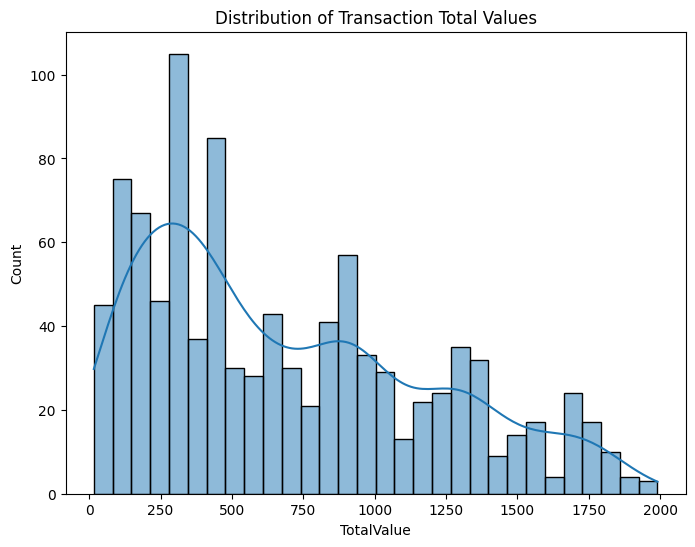

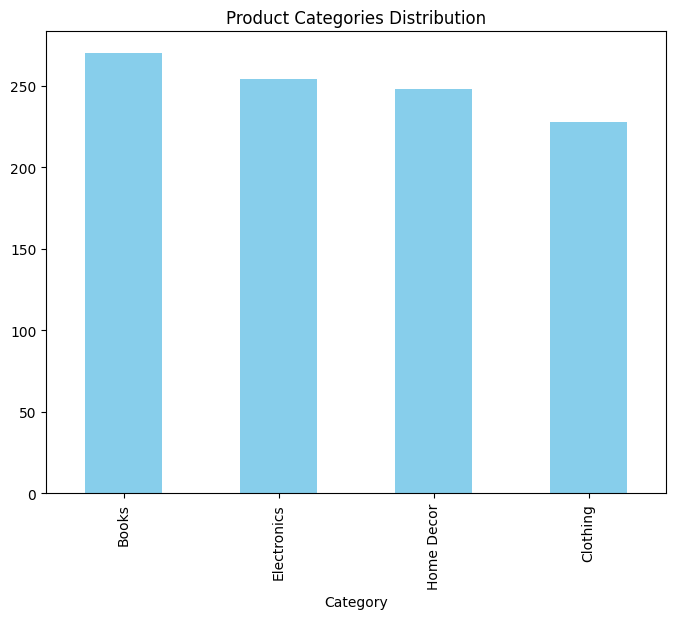

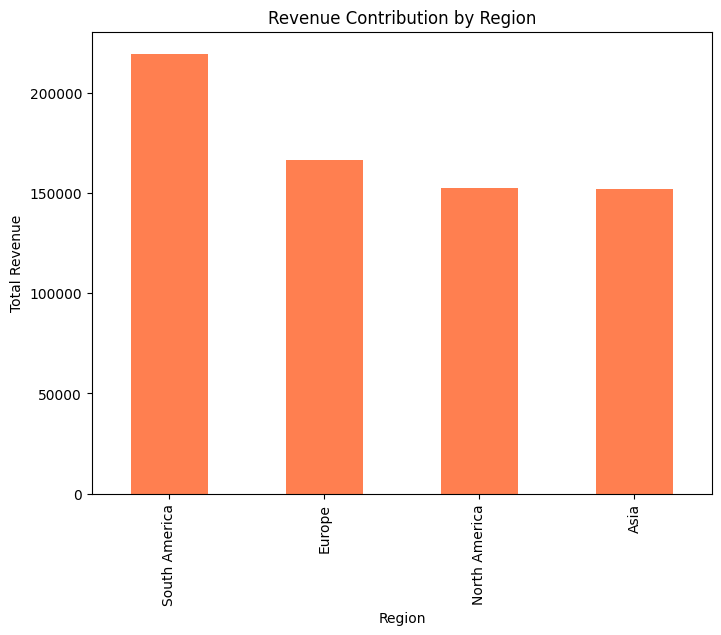

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data['TotalValue'], bins=30, kde=True)
plt.title('Distribution of Transaction Total Values')
plt.show()

plt.figure(figsize=(8, 6))
data['Category'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Product Categories Distribution')
plt.show()

plt.figure(figsize=(8, 6))
region_revenue = data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
region_revenue.plot(kind='bar', color='coral')
plt.title('Revenue Contribution by Region')
plt.ylabel('Total Revenue')
plt.show()


### Revenue Contribution by each region

In [ ]:
region_revenue = data.groupby('Region')['TotalValue'].sum()
region_revenue_percentage = (region_revenue / region_revenue.sum()) * 100
print(region_revenue_percentage)


Region
Asia             22.039993
Europe           24.095029
North America    22.074548
South America    31.790431
Name: TotalValue, dtype: float64


### Category wise performance

In [ ]:
# Revenue by category
category_revenue = data.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
print(category_revenue)


Category
Books          192147.47
Electronics    180783.50
Clothing       166170.66
Home Decor     150893.93
Name: TotalValue, dtype: float64


### Customer Retention

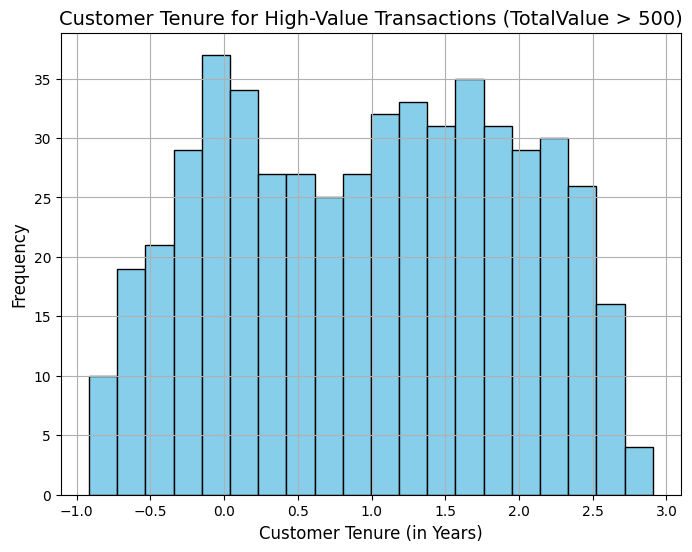

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data['SignupDate'] = pd.to_datetime(data['SignupDate'])
data['TransactionDate'] = pd.to_datetime(data['TransactionDate'])
data['CustomerTenure'] = (data['TransactionDate'] - data['SignupDate']).dt.days / 365

high_value_transactions = data[data['TotalValue'] > 500]

plt.figure(figsize=(8, 6))
plt.hist(high_value_transactions['CustomerTenure'], bins=20, color='skyblue', edgecolor='black')
plt.title('Customer Tenure for High-Value Transactions (TotalValue > 500)', fontsize=14)
plt.xlabel('Customer Tenure (in Years)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.show()


### Month wise revenues (Seasonal Trends)

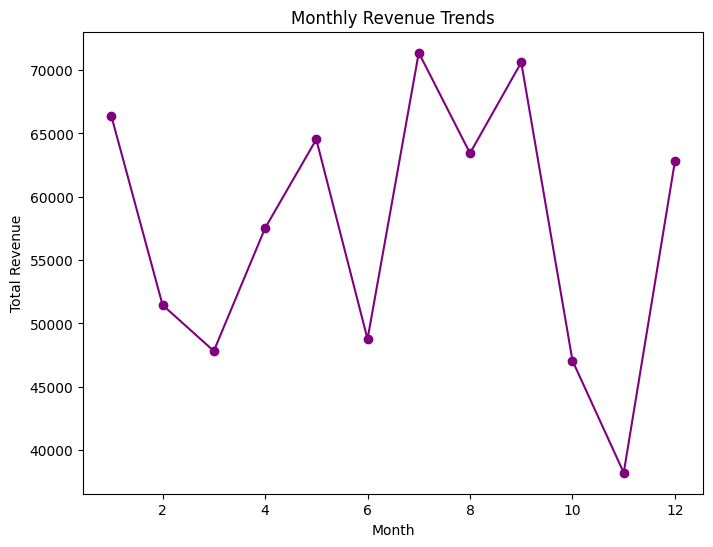

In [ ]:
data['Month'] = data['TransactionDate'].dt.month

monthly_trends = data.groupby('Month')['TotalValue'].sum()
plt.figure(figsize=(8, 6))
monthly_trends.plot(kind='line', marker='o', color='purple')
plt.title('Monthly Revenue Trends')
plt.ylabel('Total Revenue')
plt.xlabel('Month')
plt.show()
